# Convert classical function to quantum circuit

This is just a toy, but is so cool :)
    
First, we take any classical function as argument to `from_classical()` method:
    
- Function graph is built by running it with range of inputs
- Function graph is converted to statevector (normalized and interpolated to 2**N elements)
- Then we use generator to find circuit which prepares that statevector

Now, when we have circuit, we can produce (near) the same output as classical function with `run()` method:

- executes circuit in many shots and builds histogram of probabilities
- probabilities are converted back to function graph (interpolate and normalize)
- input argument is normalized and correct point from the reconstructed function graph is returned


## Example

### Step 1: convert classical function to circuit

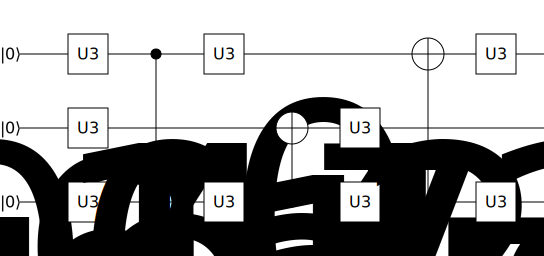

In [1]:
import numpy as np

from classical_to_quantum import QuantumFunction


def classical_function(x):
    return x**2

quantum_function = QuantumFunction()

quantum_function.from_classical(classical_function, options={ "input": { "min": -np.pi, "max": np.pi }, "num_qubits": 3 })

quantum_function.draw()



### Step 2: Now we have circuit

Let's plot both original classical and quantum function graph:

/opt/homebrew/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


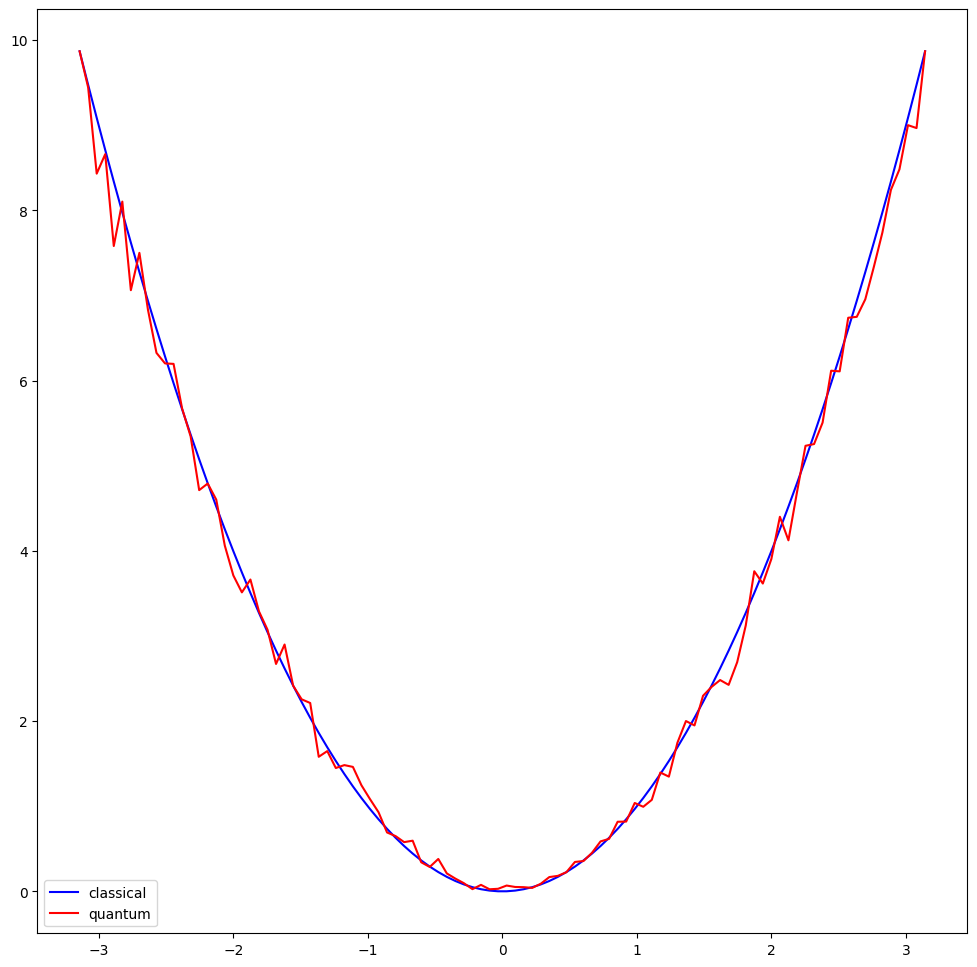

In [2]:

quantum_function.use_statevector = False
quantum_function.plot()


### Step 3: run quantum function and see result

Result is not exact but is close (more qubits and more shots = better accuracy):

In [3]:
y = quantum_function.run(3)

print(y)

8.897101120420842


Voilà!